> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, axis, show , pie
import datetime as dt
import seaborn as sns

%matplotlib inline



datetime_is_numeric=True




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#file_path ="../no_show/noshowapp_2016.csv"

#original file path can be found in the following LINE< uncomment it if file is not localy saved >
file_path ="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv"

df = pd.read_csv(file_path)


df.columns= df.columns.str.replace('-','_').str.lower()
#df.head(10) 
#df['neighbourhood'].value_counts(), df['gender'].value_counts()

df.columns


Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [4]:
df.head(3)
df.shape

(110527, 14)

In [5]:
df[df['age'] == 0].shape

(3539, 14)

In [6]:
#df.duplicated(subset=['patientid'], keep=False)
subset_toDrop = df.loc[(df.duplicated(subset=['patientid']) ) & (df['age'] == 0) ]
backup = df.copy()
df = df.drop(subset_toDrop.index)
backup.shape , df.shape

((110527, 14), (109061, 14))

In [60]:
#---deleting duplicated paitient ID with age written as zero , keeping it only if zero is the only age record, jsut not to loose rest of data

subset_toDrop = df.loc[(df.duplicated(subset=['patientid']) ) & (df['age'] == 0)]
df = df.drop(subset_toDrop.index)
    
backup.shape , df.shape

((110527, 14), (109061, 14))

In [7]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# clean the value of no_show , change 0 if No, and 1 if Yes
df.loc[df.no_show == 'No', 'no_show'] = 0
df.loc[df.no_show == 'Yes', 'no_show'] = 1

#change the no_show column to int  rather than string
df.no_show = df.no_show.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109061 entries, 0 to 110526
Data columns (total 14 columns):
patientid         109061 non-null float64
appointmentid     109061 non-null int64
gender            109061 non-null object
scheduledday      109061 non-null object
appointmentday    109061 non-null object
age               109061 non-null int64
neighbourhood     109061 non-null object
scholarship       109061 non-null int64
hipertension      109061 non-null int64
diabetes          109061 non-null int64
alcoholism        109061 non-null int64
handcap           109061 non-null int64
sms_received      109061 non-null int64
no_show           109061 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 12.5+ MB


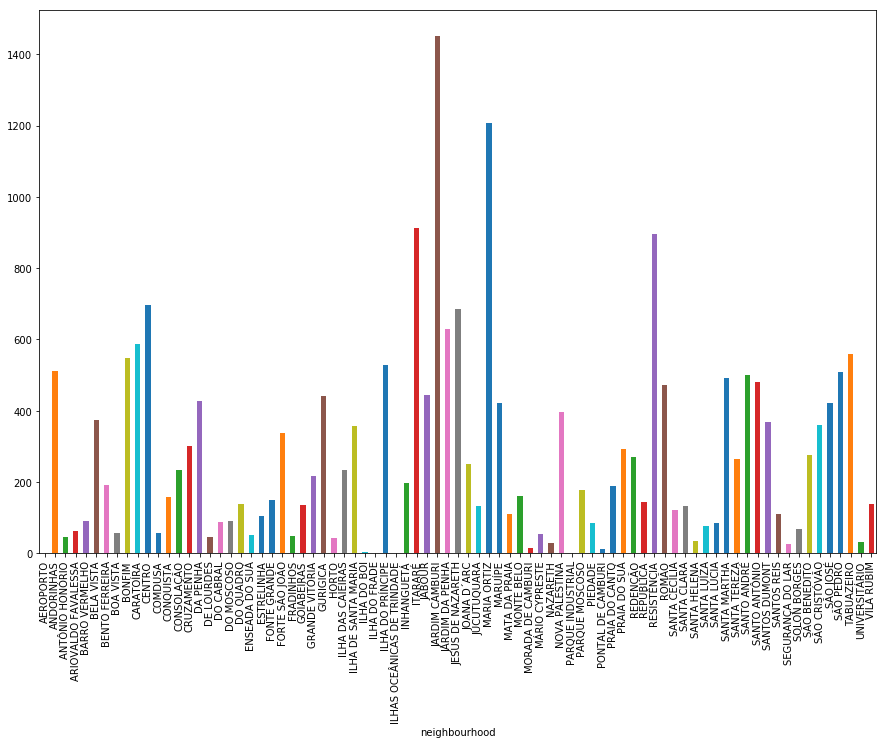

In [9]:


# getting Mean of canceled clients by area

count_per_area = df.groupby('neighbourhood')['no_show'].sum()

total_per_area = df.groupby('neighbourhood').sum()

areas = df['neighbourhood']

#draw the histagram of canceled compared to total bookings per area

count_per_area.plot(kind='bar', x='Neighbourhood Name', y='Number of No Show',  figsize=(15, 10))

#plt.bar(count_per_area.sum(), areas)
#plt.title("Number of No Show appointmnets per neighbourhood")
#plt.xlabel('Number of No Show')
#plt.ylabel('Neighbourhood')




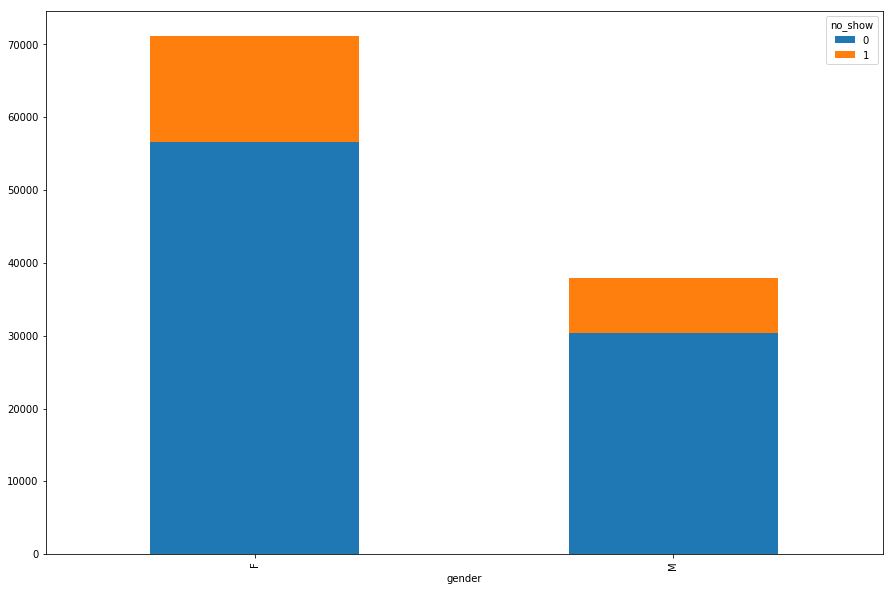

In [10]:
df.groupby(['gender','no_show']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,10))
plt.show()


([<matplotlib.patches.Wedge at 0x7f1b0979d9e8>,
 [Text(0.505432,0.977005,'Male Patients Percentage'),
  Text(-0.505432,-0.977005,'Female Patients Percetage')])

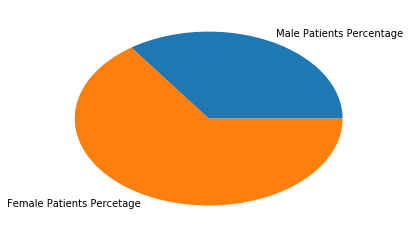

In [11]:
f_p= df['gender'].value_counts()['F']
m_p= df['gender'].value_counts()['M']
f_p , m_p

male_percentage = m_p/(m_p+f_p)
female_percentage = f_p/(m_p+f_p)

gender_data= (male_percentage, female_percentage)
gender_labels = ('Male Patients Percentage','Female Patients Percetage')
plt.pie(gender_data,labels=gender_labels)


([<matplotlib.patches.Wedge at 0x7f1b097642b0>,
 [Text(1.07332,0.240815,'JARDIM DA PENHA'),
  Text(0.904603,0.625855,'MATA DA PRAIA'),
  Text(0.688642,0.857772,'PONTAL DE CAMBURI'),
  Text(0.468299,0.995337,'REPÚBLICA'),
  Text(0.248739,1.07151,'GOIABEIRAS'),
  Text(0.0356568,1.09942,'ANDORINHAS'),
  Text(-0.166895,1.08727,'CONQUISTA'),
  Text(-0.356912,1.04049,'NOVA PALESTINA'),
  Text(-0.526587,0.965767,'DA PENHA'),
  Text(-0.673013,0.870089,'TABUAZEIRO'),
  Text(-0.801315,0.753587,'BENTO FERREIRA'),
  Text(-0.905755,0.624186,'SÃO PEDRO'),
  Text(-0.986696,0.486241,'SANTA MARTHA'),
  Text(-1.04602,0.340368,'SÃO CRISTÓVÃO'),
  Text(-1.08326,0.191171,'MARUÍPE'),
  Text(-1.09909,0.0447289,'GRANDE VITÓRIA'),
  Text(-1.09572,-0.0969296,'SÃO BENEDITO'),
  Text(-1.07431,-0.23633,'ILHA DAS CAIEIRAS'),
  Text(-1.0356,-0.370861,'SANTO ANDRÉ'),
  Text(-0.980871,-0.497888,'SOLON BORGES'),
  Text(-0.914668,-0.61105,'BONFIM'),
  Text(-0.840502,-0.709617,'JARDIM CAMBURI'),
  Text(-0.75756,-0.797561

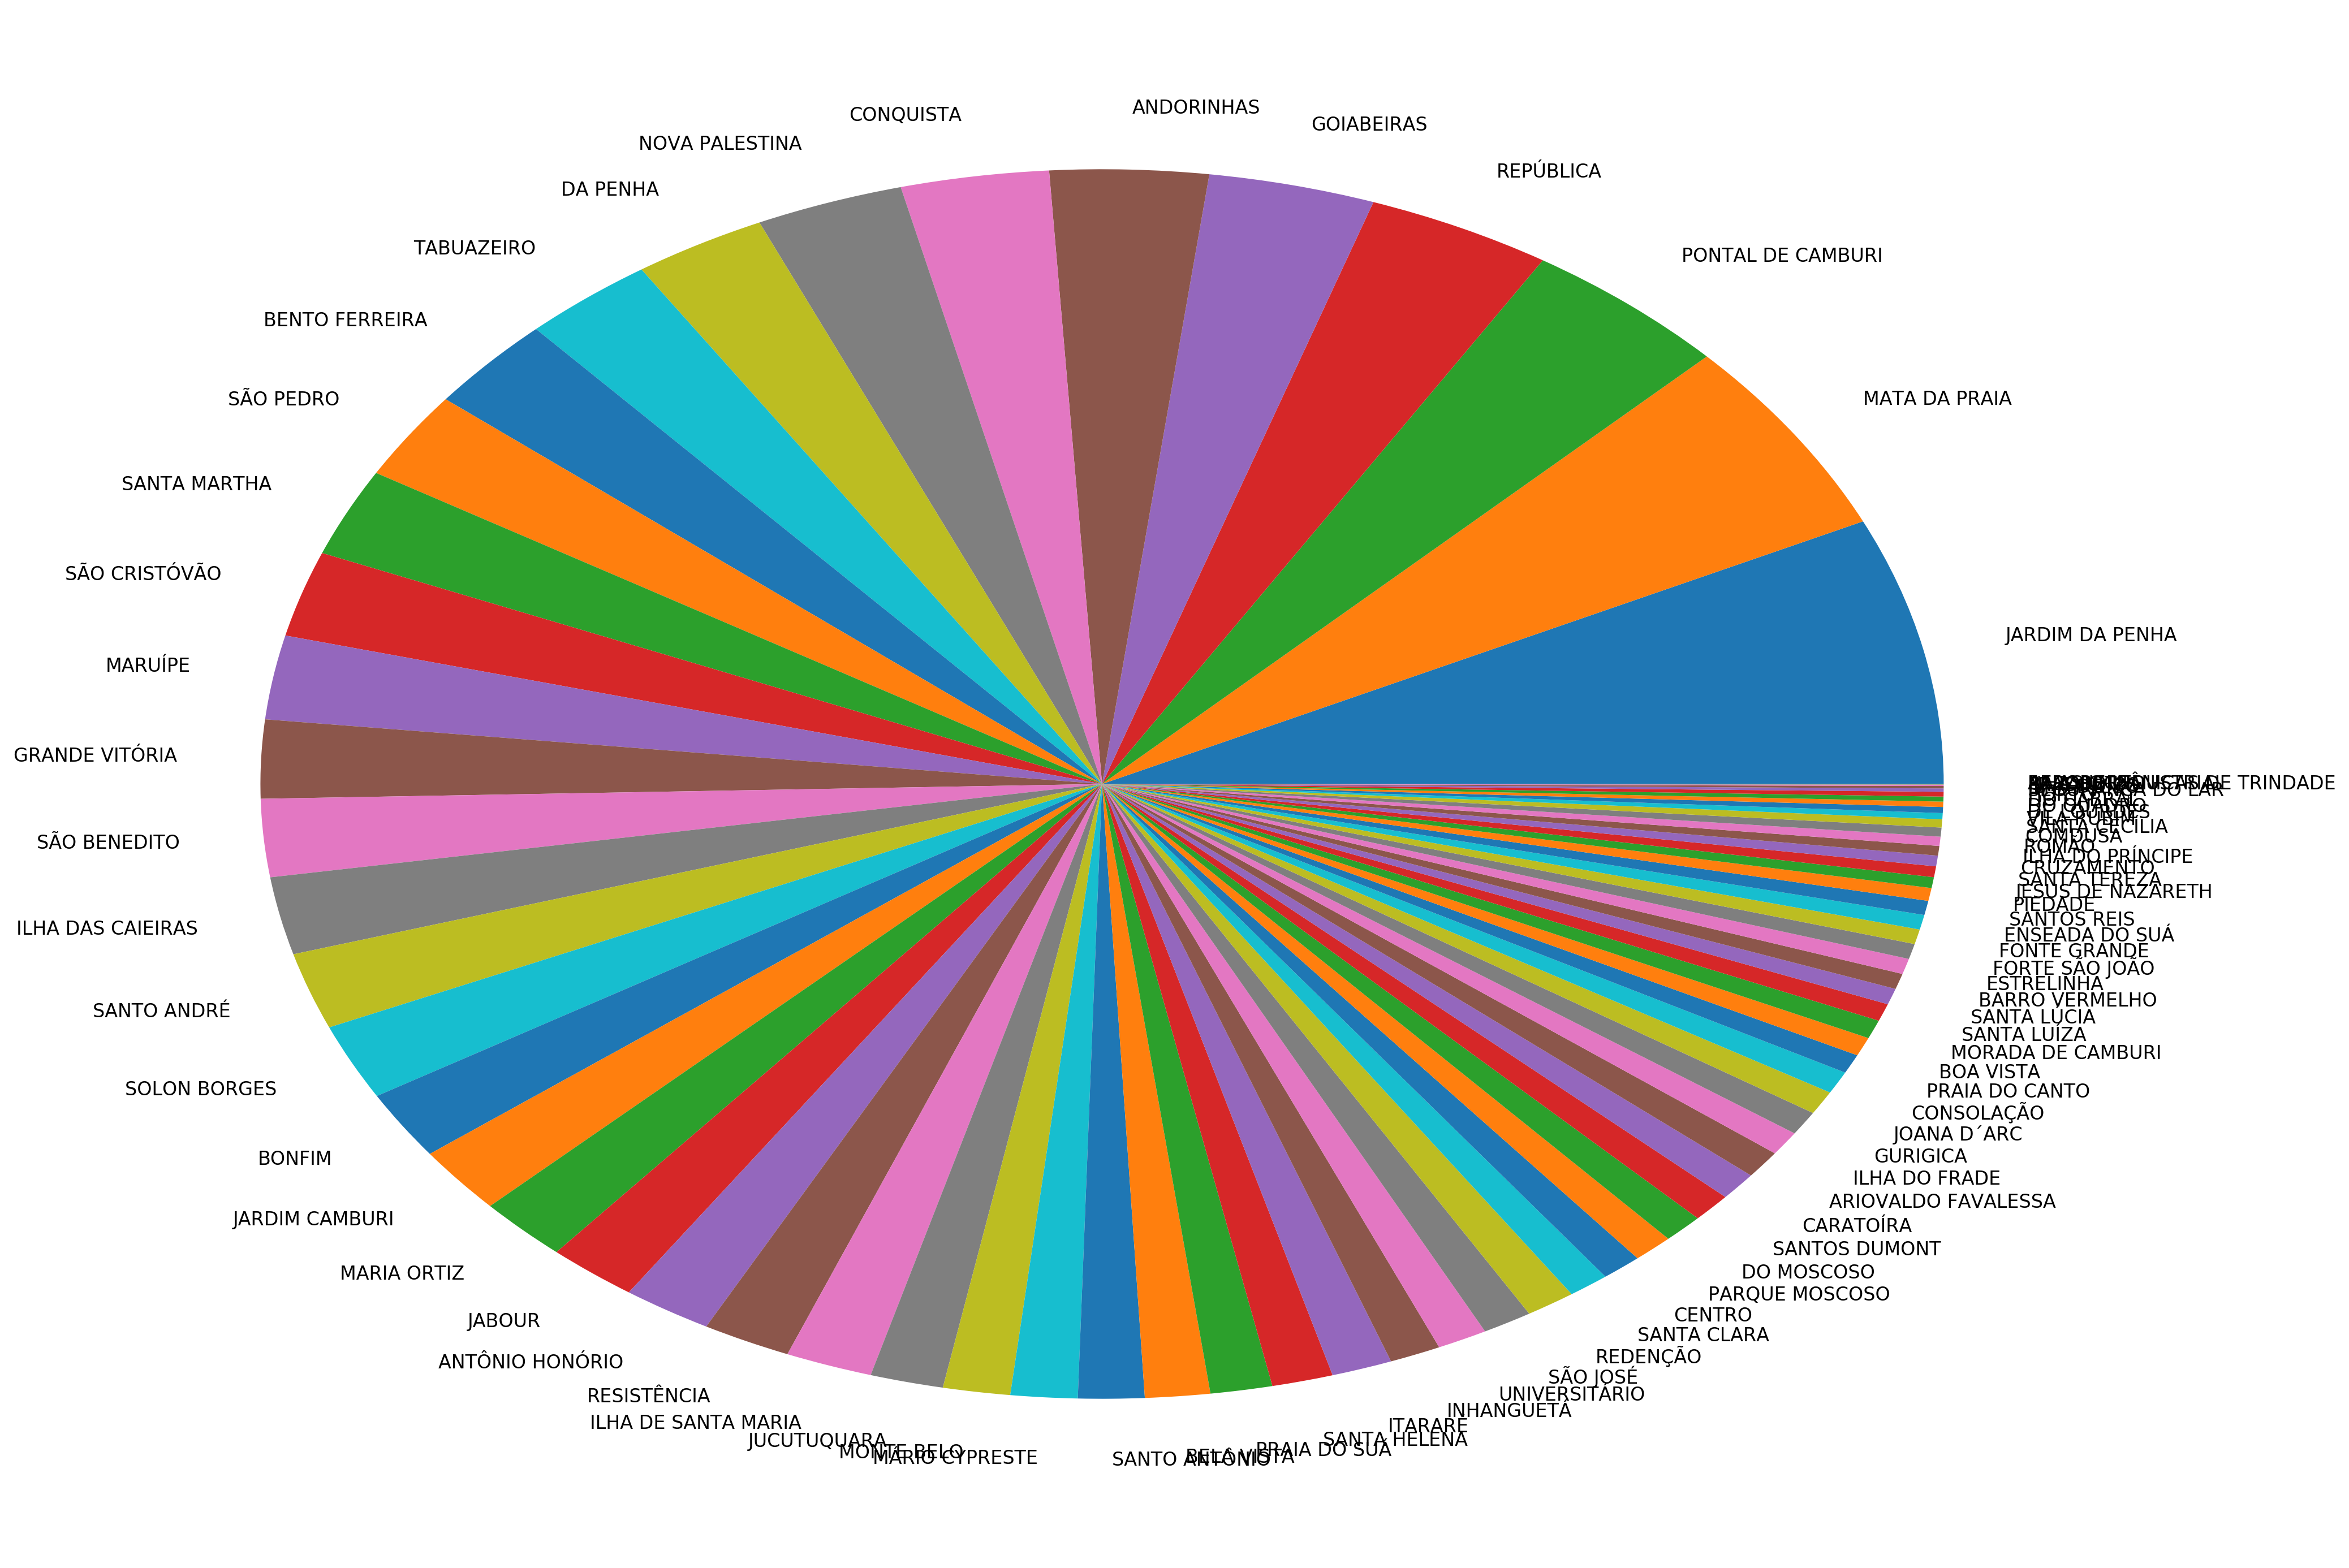

In [12]:
'''Reporting the pie chart per Neighbourhood '''

paitients_per_area = df['neighbourhood'].value_counts()
list_areas= df.neighbourhood.unique()
#paitients_per_area
#list_areas
plt.xlable=list_areas
plt.ylable=paitients_per_area

figure(figsize=(20, 15), dpi=240)

plt.pie(paitients_per_area, labels=list_areas)


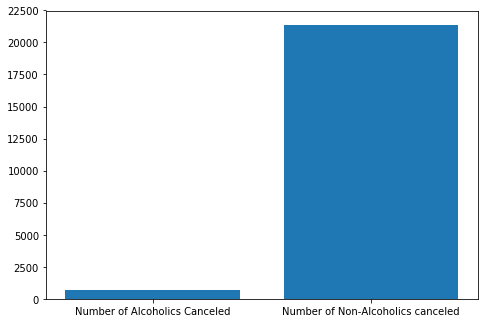

In [13]:
'''Exploring the Alcoholism perfcentage'''


non_alc= df['alcoholism'].value_counts()[0]
alc= df['alcoholism'].value_counts()[1]
non_alc , alc

non_alc_canceled= df[(df["alcoholism"] == 0) & (df["no_show"] == 1)].count()[0]

alc_canceled = df[(df["alcoholism"] == 1) & (df["no_show"] == 1)].count()[0]

total_canceled = df[df["no_show"] == 1].count()[0]



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lable = ['Number of Alcoholics Canceled' ,  "Number of Non-Alcoholics canceled"]
numbers = [alc_canceled , non_alc_canceled] 
ax.bar(lable,numbers)
plt.show()


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AttributeError: Can only use .dt accessor with datetimelike values

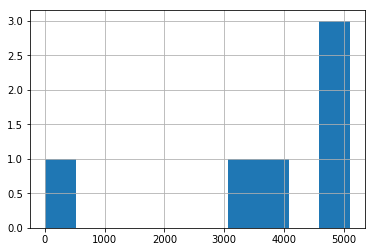

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


## changing Sceduled date to Date time to be able to reach the day of week and time with higher cancelation 

subset_df = df[df["no_show"] == 1]
subset_df['appointmentday'] = pd.to_datetime(subset_df['appointmentday'], format='%Y-%m-%d')
subset_df['appointmentday'].dt.dayofweek.value_counts().hist()

# isntead of slicing the data frame as the previoys 3 lines, we sum it up in one line as follows: -

#df.loc[(df['no_show']== 1),'appointmentday'].dt.dayofweek.value_counts()
#but for some reason it worked on my local machine but not when uploaded the file, that is why there is a warning

#we need to name lables of the hist() shown as day names, 5 is the highest cancelation is day Tuesday, since day counts 0 to MOnday

day_names=['Tuesday','Wednesday','Monday','Thursday','Friday','Saturday','Sunday']
yax = df.loc[(df['no_show']== 1),'appointmentday'].dt.dayofweek.value_counts()


#yax.index, yax.values , day_names


plt.xlabel(day_names)
plt.ylabel(yax.values)
plt.title('Cancelation per Day of Week')
plt.grid(True)
plt.show()




#People Tend to cancel more when schedueled on Tuesday and Wednesday

<AxesSubplot:xlabel='handcap'>

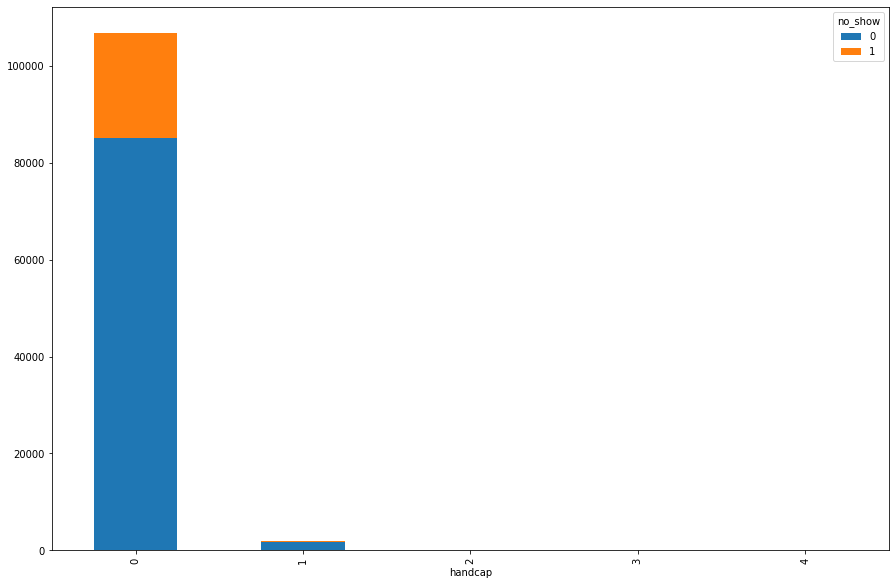

In [48]:
    
age_range=['0-19', '20-30','40-60','Greater than 60']
no_showgroup= df[df['no_show'] ==1]

#df.info()
#df.alcoholism.value_counts()

df.groupby(['handcap','no_show']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,10))




0    107167
1      3360
Name: alcoholism, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [417]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [121]:
#df.groupby('no_show')['age'].median()
#med_no_show = df.groupby('no_show')['age'].median()[1]
#med_show = df.groupby('no_show')['age'].median()[0]

#med_no_show , med_show
#no_show_group = df.query('no_show == "Yes"')

#'''Perecent of group cancels below median is'''
#percent_lowage = no_show_group['age'] <med_no_show
#percent_lowage
#df[df['age'].query('no_show' == 'Yes')< med_no_show ]
#percent_highage = df[df['age']>= med_no_show ]
#percent_lowage

#median_canceled = no_show_group['age'].median() 





In [73]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!